In [5]:
# Step 1: Import essential libraries
import numpy as np           # for numerical operations
import pandas as pd          # for data manipulation
import matplotlib            # for plotting
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns        # advanced visualization
from sklearn.impute import SimpleImputer, KNNImputer  # missing value handling
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import missingno as msno     # missing value visualization

# Step 2: Check versions to verify correct installation
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("Scikit-learn version:", SimpleImputer.__module__.split('.')[0] + " " + SimpleImputer.__module__.split('.')[1])
print("Missingno version:", msno.__version__)



NumPy version: 2.3.2
Pandas version: 2.3.1
Matplotlib version: 3.10.5
Seaborn version: 0.13.2
Scikit-learn version: sklearn impute
Missingno version: 0.5.2


In [15]:
# Step 1: Load Titanic dataset from seaborn
df=sns.load_dataset('titanic')
# Step 2: Quick overview
print("Dataset shape:", df.shape)  # rows x columns
print("\nColumn names:", df.columns.tolist())  # list of columns
# Step 3: Peek at data
print("\nFirst 5 rows:\n", df.head())
print("\nLast 5 rows:\n", df.tail())

Dataset shape: (891, 15)

Column names: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

First 5 rows:
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Last 5 rows:
   

In [16]:
# Step 4: Info & summary
print("\nDataset info:\n")
print(df.info())  # data types, non-null counts
print("\nNumeric summary:\n")
print(df.describe())  # mean, min, max, std


Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

Numeric summary:

         survived      pclass         a

In [17]:
# Step 5: Explore categorical column example
print("\nCounts of 'class' column values:\n", df['class'].value_counts())


Counts of 'class' column values:
 class
Third     491
First     216
Second    184
Name: count, dtype: int64


3️⃣ Missing Data Detection & Visualization

In [18]:
# Step 1: Compute missing counts and percentage
missing_counts = df.isnull().sum()  # number of missing values per column
missing_percent = (df.isnull().mean() * 100)  # % missing values

print("Missing Values Count:\n", missing_counts)
print("\nMissing Values Percentage:\n", missing_percent)

Missing Values Count:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Missing Values Percentage:
 survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64



Missing Data Matrix:



<Figure size 1000x500 with 0 Axes>

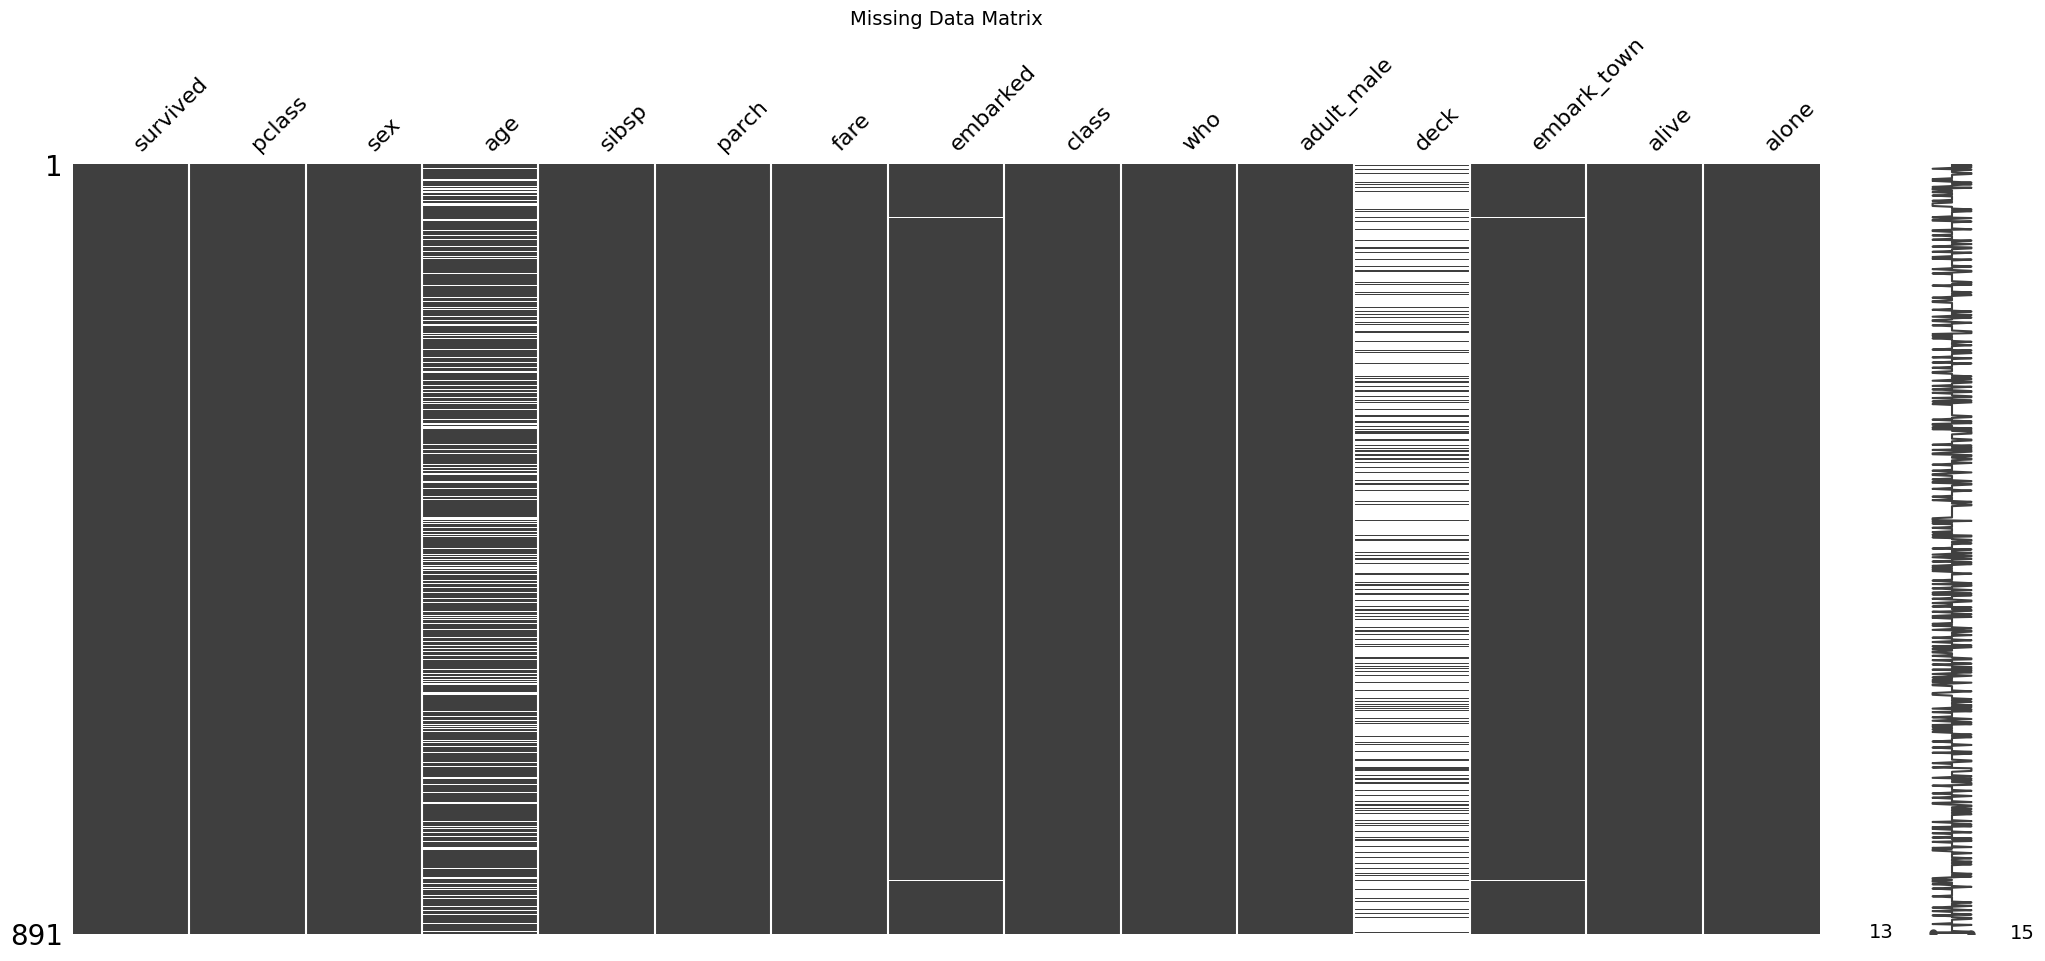


Missing Data Bar Chart:



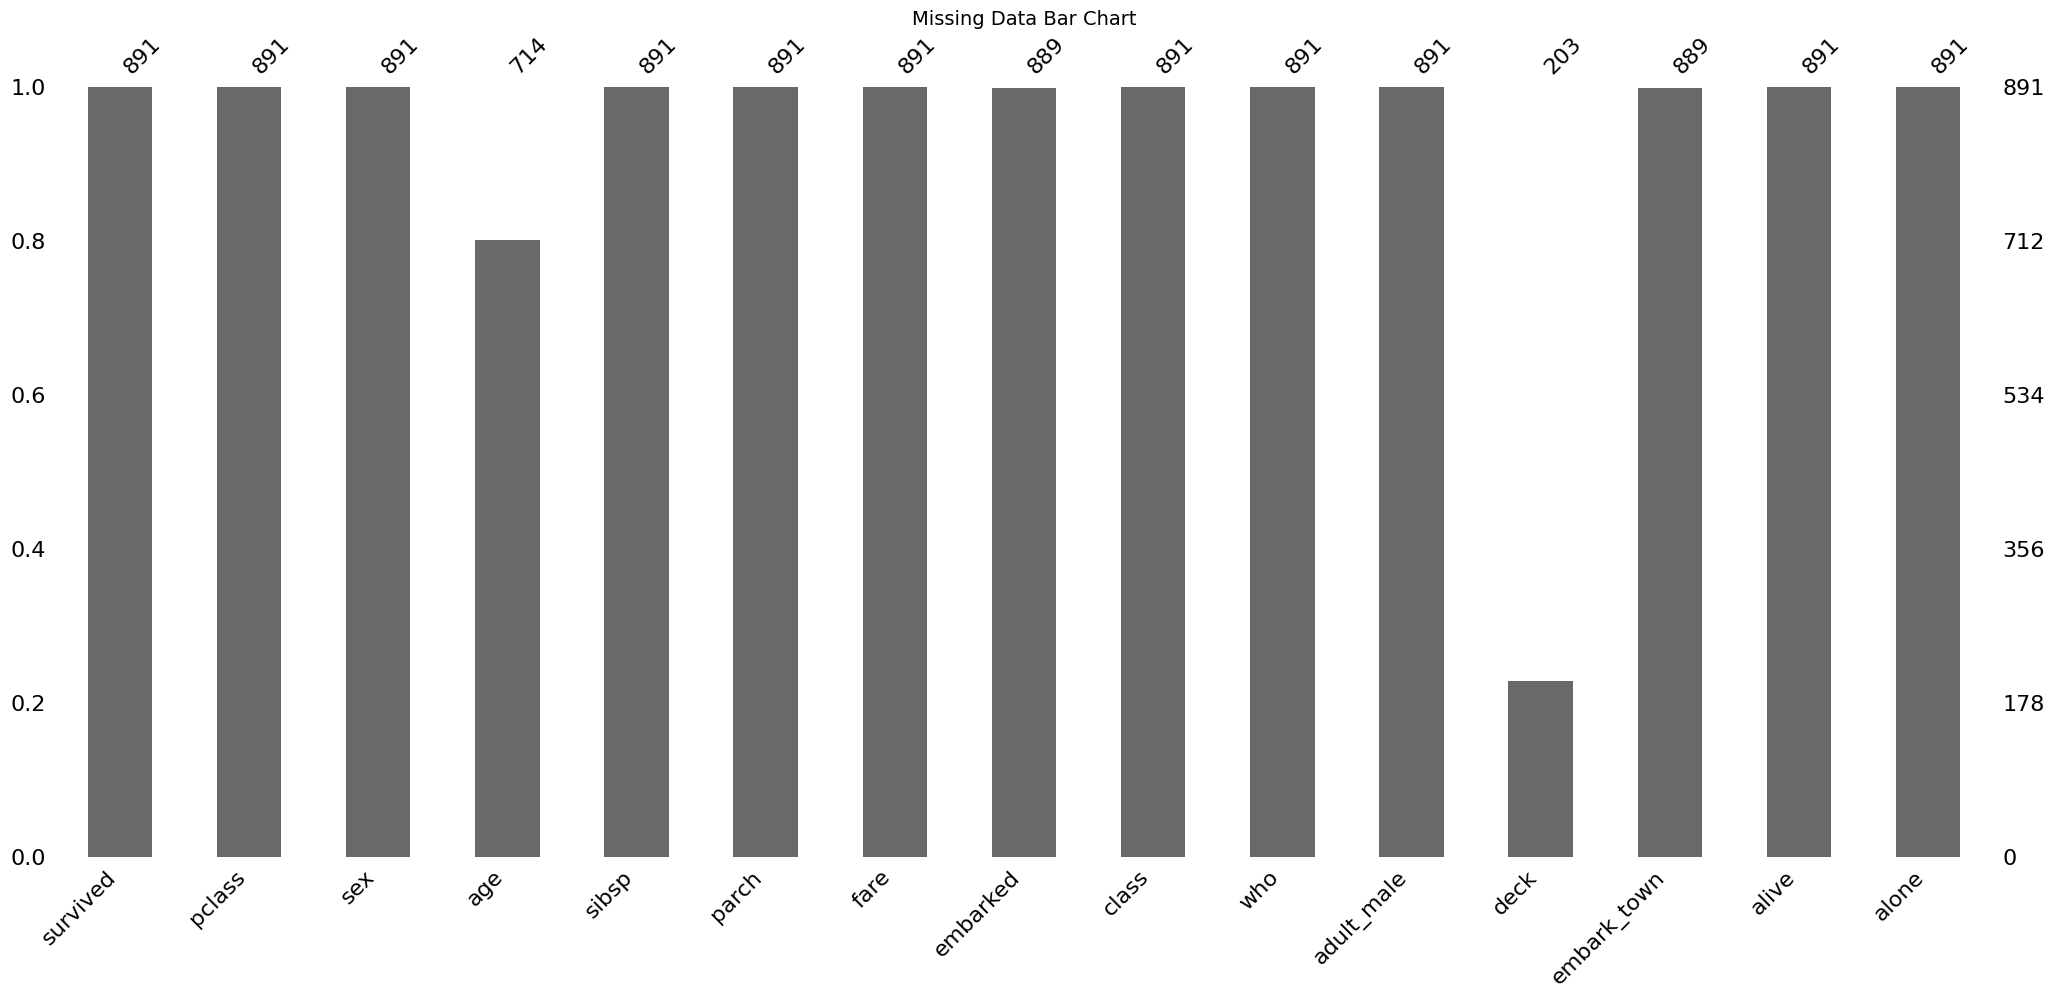


Missing Data Heatmap:



<Figure size 800x600 with 0 Axes>

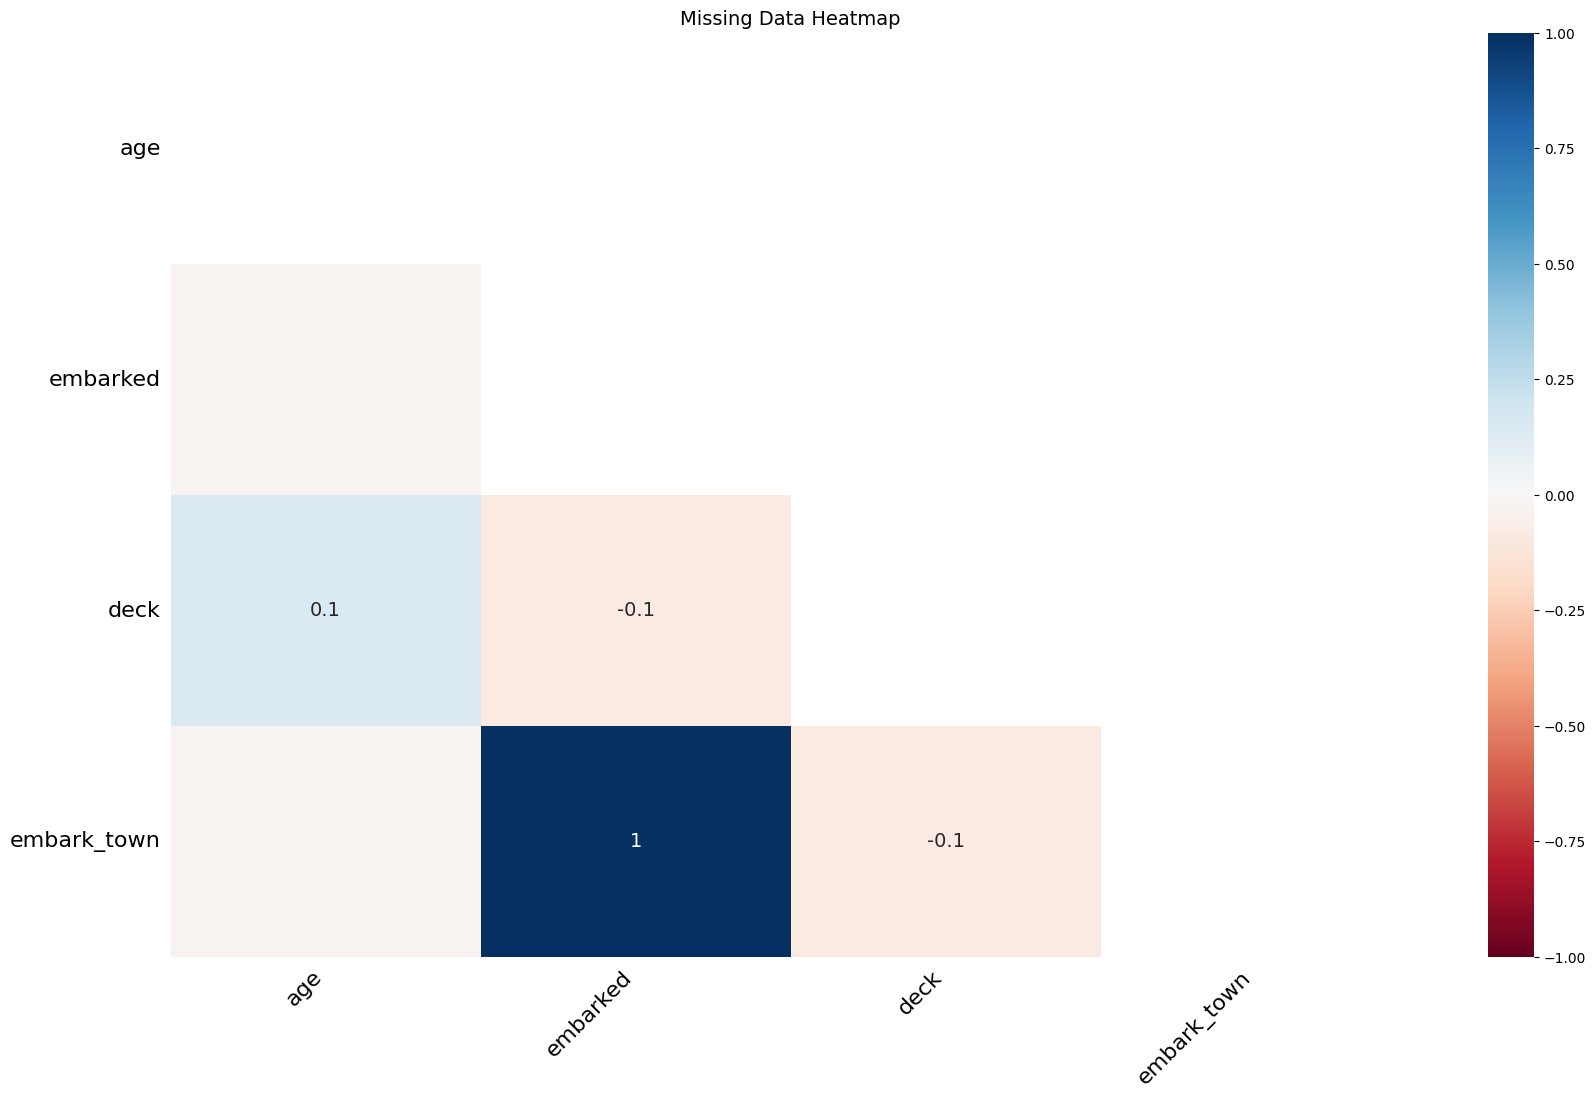

In [ ]:
# # Step 2: Visualize missing data using missingno

# 2a. Matrix: shows gaps in data per row/column
print("\nMissing Data Matrix:\n")
plt.figure(figsize=(10, 5))
msno.matrix(df)
plt.title("Missing Data Matrix", fontsize=14)
plt.show()

# 2b. Bar chart: counts of missing values per column
print("\nMissing Data Bar Chart:\n")
plt.figure(figsize=(8, 4))
msno.bar(df)
plt.title("Missing Data Bar Chart", fontsize=14)
plt.show()

# 2c. Heatmap: correlation of missingness between columns
print("\nMissing Data Heatmap:\n")
plt.figure(figsize=(8, 6))
msno.heatmap(df)
plt.title("Missing Data Heatmap", fontsize=14)
plt.show()

4️⃣ Handling Missing Values – Imputation Methods

In [49]:
# Step 1: Separate Numerical vs Categorical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object','category']).columns

In [48]:
# Step 2: Simple Imputer
# Numeric median imputation
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Categorical mode imputation
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])



In [47]:
# Step 3: Advanced Imputer Examples
# Iterative Imputer
iter_imputer = IterativeImputer(random_state=42)
df[num_cols] = iter_imputer.fit_transform(df[num_cols])
# KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)
df[num_cols] = knn_imputer.fit_transform(df[num_cols])


In [50]:
# Step 4: Verify no missing values remain
print(df.isnull().sum())

survived               0
pclass                 0
sex                    0
age                    0
sibsp                  0
parch                  0
fare                   0
embarked               0
class                  0
who                    0
adult_male             0
deck                   0
embark_town            0
alive                  0
alone                  0
survived_missing       0
pclass_missing         0
age_missing            0
sibsp_missing          0
parch_missing          0
fare_missing           0
sex_missing            0
embarked_missing       0
class_missing          0
who_missing            0
deck_missing           0
embark_town_missing    0
alive_missing          0
dtype: int64


5️⃣ Handling Categorical vs Numeric Missing Values & Creating Missing Indicators

Missing Indicator:
A new feature/column that marks whether a value in the original column was missing (1) or present (0).

What it does:

Captures which entries were originally missing.

Lets models learn patterns from missingness itself.

Why it’s necessary:

Imputation fills missing values, but sometimes the fact that a value was missing carries information.

Missing indicators preserve this signal, helping models make better predictions.

**⚠️ Warning:** Missing indicators must be created **before** imputing missing values.  
Creating them after imputation will **not capture the original missingness**.


In [39]:
# Create missing indicators for numeric columns
for col in num_cols:
    df[col + '_missing'] = df[col].isnull().astype(int)

# Create missing indicators for categorical columns
for col in cat_cols:
    df[col + '_missing'] = df[col].isnull().astype(int)

In [40]:
# Verify indicator columns
print(df.filter(like='_missing').head())

   survived_missing  pclass_missing  age_missing  sibsp_missing  \
0                 0               0            0              0   
1                 0               0            0              0   
2                 0               0            0              0   
3                 0               0            0              0   
4                 0               0            0              0   

   parch_missing  fare_missing  sex_missing  embarked_missing  class_missing  \
0              0             0            0                 0              0   
1              0             0            0                 0              0   
2              0             0            0                 0              0   
3              0             0            0                 0              0   
4              0             0            0                 0              0   

   who_missing  deck_missing  embark_town_missing  alive_missing  
0            0             0                    0

6️⃣ Day-1 Coding Drill: Imputer Pipeline

We’ll build a scikit-learn pipeline that automatically applies different imputers to numeric and categorical columns. This is how you would handle preprocessing in a real ML project.

Why it matters

Avoids manual repetitive imputation steps

Ensures numeric and categorical data handled correctly

Pipelines integrate seamlessly into model training and deployment


In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [52]:
# Step 1: Pipelines
numeric_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median'))  # numeric median imputation
])

categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent'))  # categorical mode imputation
    ])

In [53]:
# Step 2: ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])

In [54]:
# Step 3: Fit and transform
df_processed = preprocessor.fit_transform(df)

In [55]:
# Step 4: Convert back to DataFrame with column names
import numpy as np
processed_columns = list(num_cols) + list(cat_cols)
df_processed = pd.DataFrame(df_processed, columns=processed_columns)


In [64]:
# Step 5: Verify
print(df_processed.isnull().sum())
print(df_processed.head())

survived               0
pclass                 0
age                    0
sibsp                  0
parch                  0
fare                   0
survived_missing       0
pclass_missing         0
age_missing            0
sibsp_missing          0
parch_missing          0
fare_missing           0
sex_missing            0
embarked_missing       0
class_missing          0
who_missing            0
deck_missing           0
embark_town_missing    0
alive_missing          0
sex                    0
embarked               0
class                  0
who                    0
deck                   0
embark_town            0
alive                  0
dtype: int64
  survived pclass   age sibsp parch     fare survived_missing pclass_missing  \
0      0.0    3.0  22.0   1.0   0.0     7.25              0.0            0.0   
1      1.0    1.0  38.0   1.0   0.0  71.2833              0.0            0.0   
2      1.0    3.0  26.0   0.0   0.0    7.925              0.0            0.0   
3      1.0    1.0

Final Steps

In [59]:
# Save as CSV inside outputs folder
df_processed.to_csv("C:/Users/Admin/Documents/Machine_Learning/DataPreprocessing/ML_DataPreprocessing/Outputs_Datasets/titanic_pipeline_processed.csv", index=False)


print("✅ File saved as: outputs/titanic_pipeline_processed.csv")


✅ File saved as: outputs/titanic_pipeline_processed.csv


In [63]:
import os
print("File exists:", os.path.isfile("C:/Users/Admin/Documents/Machine_Learning/DataPreprocessing/ML_DataPreprocessing/Outputs_Datasets/titanic_pipeline_processed.csv"))

File exists: True
